# Assignment - 7
# Team Name - Turing Machines
## Team Members
### Vikram G - 01FB16ECS484
### Vinayaka R Kamath - 01FB16ECS445
### Nikhil V Revankar - 01FB16ECS230

In [536]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
import math
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 7

In [537]:
train_data = pd.read_csv('StockTrain.csv',parse_dates=['date'], index_col='date')
print("Train-Data\n",train_data.head())

test_data = pd.read_csv('StockTest.csv',parse_dates=['date'], index_col='date')
print("Test-Data\n",test_data.head())

Train-Data
              close     volume    open      high      low
date                                                    
2016-03-18  232.74  4704761.0  229.10  234.4800  228.060
2016-03-21  238.32  5289014.0  235.34  239.8800  235.000
2016-03-22  234.24  4303052.0  237.21  238.9900  232.558
2016-03-23  222.58  4936203.0  232.37  234.7300  222.030
2016-03-24  227.75  4956604.0  215.78  228.8877  215.000
Test-Data
              close     volume    open    high     low
date                                                 
2017-11-24  315.55  3244065.0  313.79  316.41  311.00
2017-11-27  316.81  4537779.0  313.25  317.34  309.51
2017-11-28  317.55  4941703.0  316.36  320.00  313.92
2017-11-29  307.54  8757463.0  317.30  318.00  301.23
2017-11-30  308.85  4345434.0  308.56  310.70  304.54


# Question-1

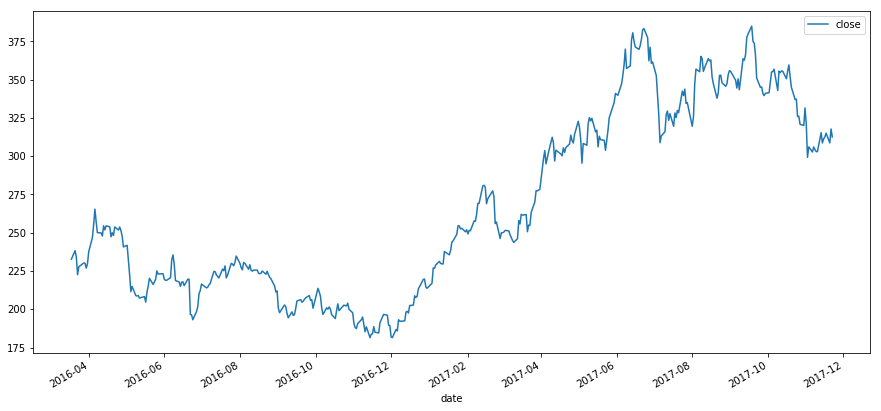

In [538]:
# 1(a)
data=pd.read_csv("StockTrain.csv")
data['date']=pd.to_datetime(data['date'])
lines=data.plot(x='date',y='close',kind='line')
plt.show()

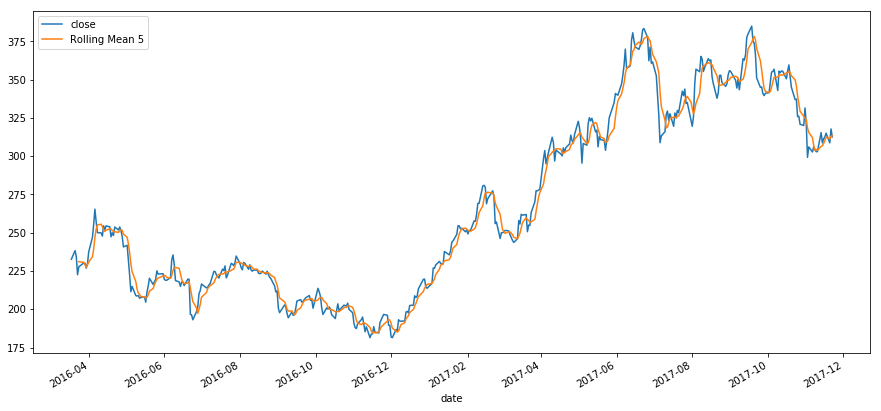

In [539]:
# 1(b)
# Rolling mean 5
lines=data.plot(x='date',y='close',kind='line')
data['Rolling Mean 5']=data['close'].rolling(5).mean()
data.plot(x='date',y='Rolling Mean 5',kind='line',ax=lines)
plt.show()

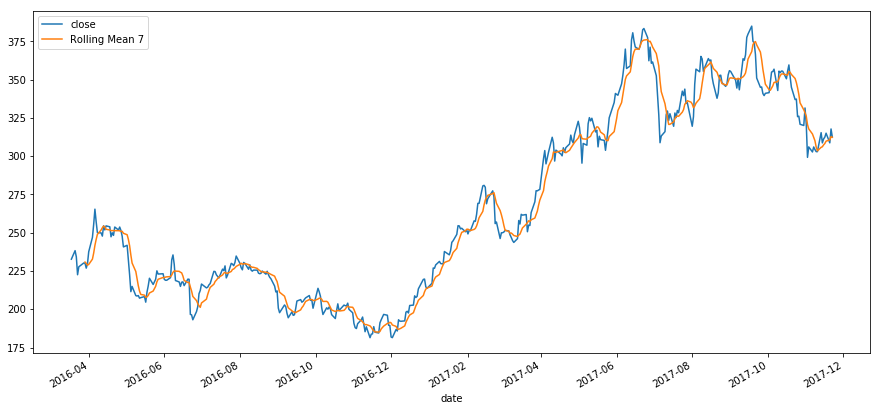

In [540]:
# Rolling mean 7
lines=data.plot(x='date',y='close',kind='line')
data['Rolling Mean 7']=data['close'].rolling(7).mean()
data.plot(x='date',y='Rolling Mean 7',kind='line',ax=lines)
plt.show()

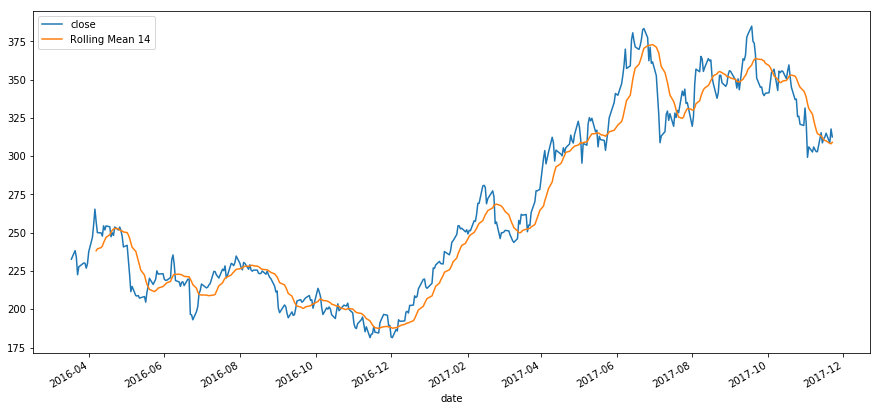

In [541]:
# Rolling mean 14
lines=data.plot(x='date',y='close',kind='line')
data['Rolling Mean 14']=data['close'].rolling(14).mean()
data.plot(x='date',y='Rolling Mean 14',kind='line',ax=lines)
plt.show()

## As you can see if we increase the window size, smoothness of the curve also increase

# Question-2

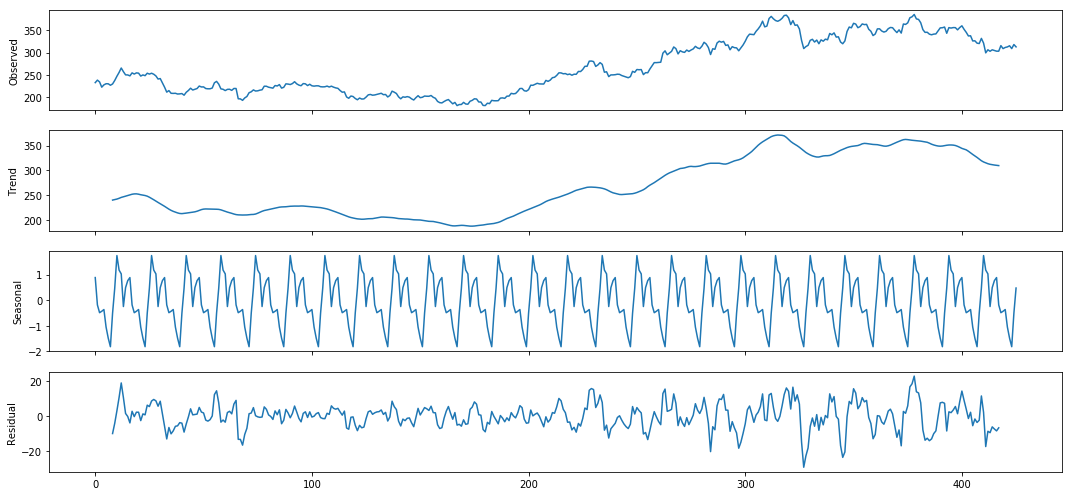

In [542]:
# freq = 16
result = seasonal_decompose(data['close'], freq=16)
result.plot()
plt.show()

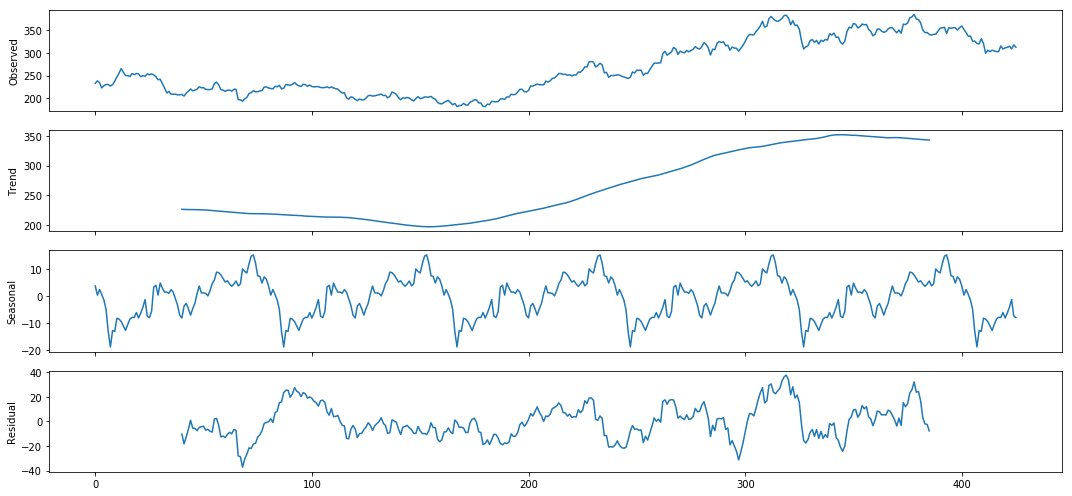

In [543]:
# freq = 80
result = seasonal_decompose(data['close'], freq=80)
result.plot()
plt.show()

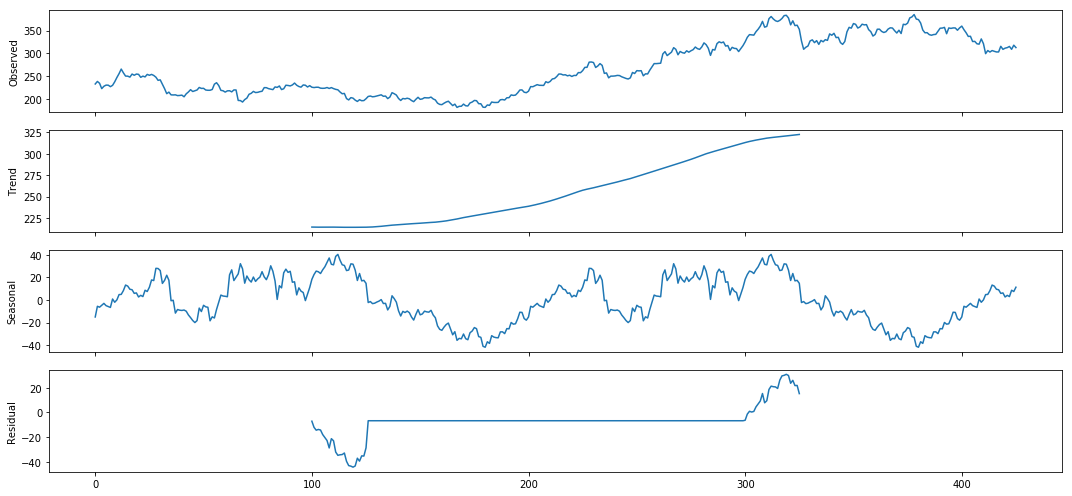

In [544]:
# freq = 200
result = seasonal_decompose(data['close'], freq=200)
result.plot()
plt.show()

## As you can see the seasonality changes with frequency, if the frequency value is small then there are more season observed in the plot compared to the one with higher frequency
## According to the plots seasonality with frequency 80 represent right seasonality of the time series.

# Question-3

## (a) (i)

In [545]:
train_CP = train_data['close']
test_CP = test_data['close']

In [546]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries): 
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

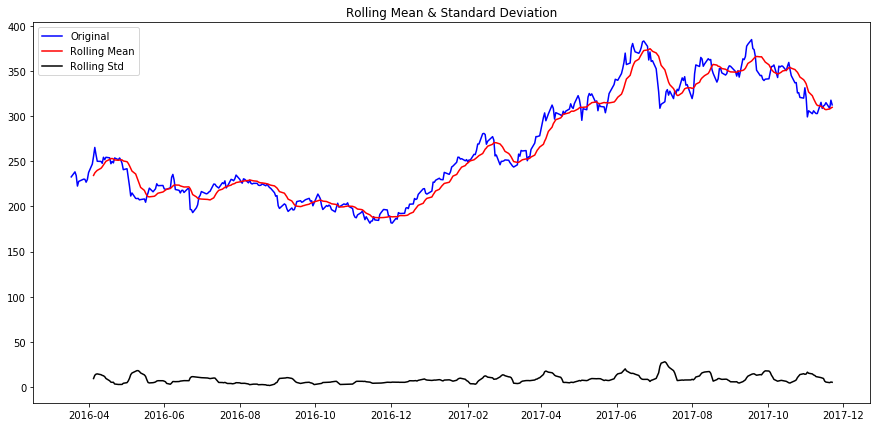

Results of Dickey-Fuller Test:
Test Statistic                  -1.038220
p-value                          0.739070
#Lags Used                       3.000000
Number of Observations Used    422.000000
Critical Value (1%)             -3.445941
Critical Value (5%)             -2.868413
Critical Value (10%)            -2.570431
dtype: float64


In [547]:
test_stationarity(train_CP)

### We can see that the test-Statistic value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the Closing price is not a stationary time series.

In [548]:
# log transformation
train_CP_log = np.log(train_CP)

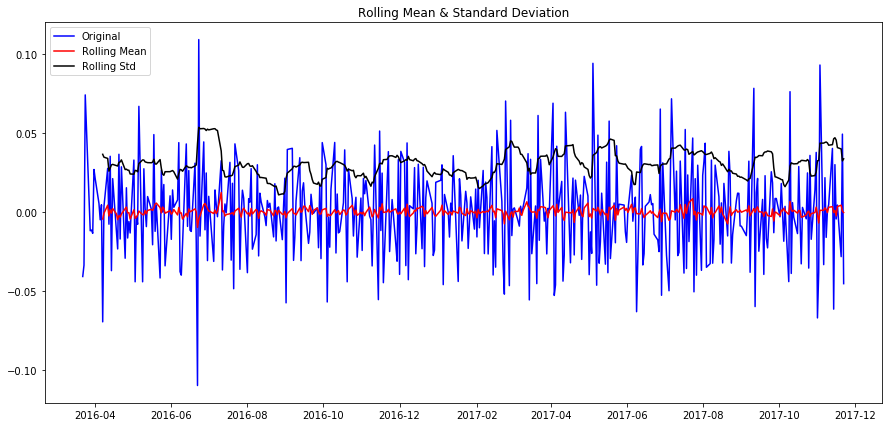

Results of Dickey-Fuller Test:
Test Statistic                -8.864759e+00
p-value                        1.450508e-14
#Lags Used                     1.600000e+01
Number of Observations Used    4.070000e+02
Critical Value (1%)           -3.446520e+00
Critical Value (5%)           -2.868668e+00
Critical Value (10%)          -2.570567e+00
dtype: float64


In [549]:
# second ordered differencing
train_CP_log_diff = train_CP_log - 2*train_CP_log.shift()+ train_CP_log.shift(periods=2)
train_CP_log_diff.dropna(inplace=True)
test_stationarity(train_CP_log_diff)

### We can see that the mean and std variations have small variations with time. 
### Also, the Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence.

## (a) (ii)

In [550]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_CP,model='additive',freq=80)
train_CP_diff_seas = train_CP - decomposition.seasonal

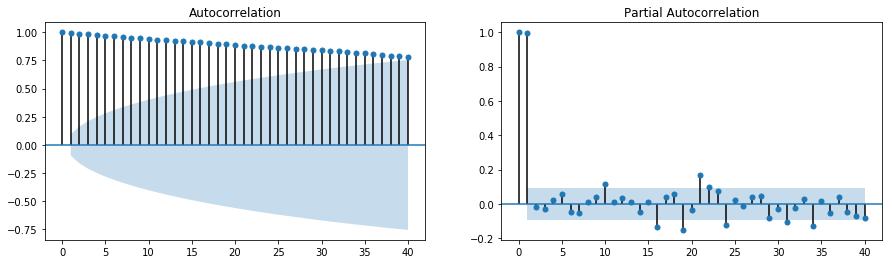

In [551]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(train_CP_diff_seas, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(train_CP_diff_seas, lags=40, ax=axes[1])

In [552]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [553]:
# Search Grid to find the best set of parametrs for ARIMA
import statsmodels.api as sm
min_aic = 9999999
min_params = "xox"
min_seasonal_params = "yoy"

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
           
            mod = sm.tsa.statespace.SARIMAX(train_CP,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min_aic:
                min_aic = results.aic
                min_params = param
                min_seasonal_params = param_seasonal
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:5978.550119893909
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:5304.553761110083
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:3731.793944621708
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:3623.5623288082897
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:3742.618298726721
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:3728.6438367365845
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:3632.5697638370075
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:3625.555465207254
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:5394.339863382507
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:4744.277858361746
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - AIC:3355.262083446529
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:3248.015523662336
SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:3374.8337116088715
SARIMAX(0, 0, 1)x(1, 0, 1, 12) - AIC:3370.1690240742682
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:3265.4519853848624
SARIMAX(0, 0, 1)x(1, 1, 1, 12) - AIC:3250.007996980965
SARIMAX(0, 1, 0)x(0, 0, 0, 12) - AIC:2738.9216758856437
SARIMAX(0, 1, 0)x(0, 0, 1, 12) - AIC:2659.4313385836576
SA

In [554]:
print("Best Parameters:{0}, {1}".format(min_params, min_seasonal_params))

Best Parameters:(0, 1, 1), (0, 1, 1, 12)


In [555]:
y_hat_avg = test_CP.copy()
mod = sm.tsa.statespace.SARIMAX(train_CP.values,
                                order=min_params,
                                seasonal_order=min_seasonal_params)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0504      0.045      1.109      0.268      -0.039       0.139
ma.S.L12      -0.9979      0.644     -1.548      0.122      -2.261       0.265
sigma2        35.6710     22.562      1.581      0.114      -8.549      79.891


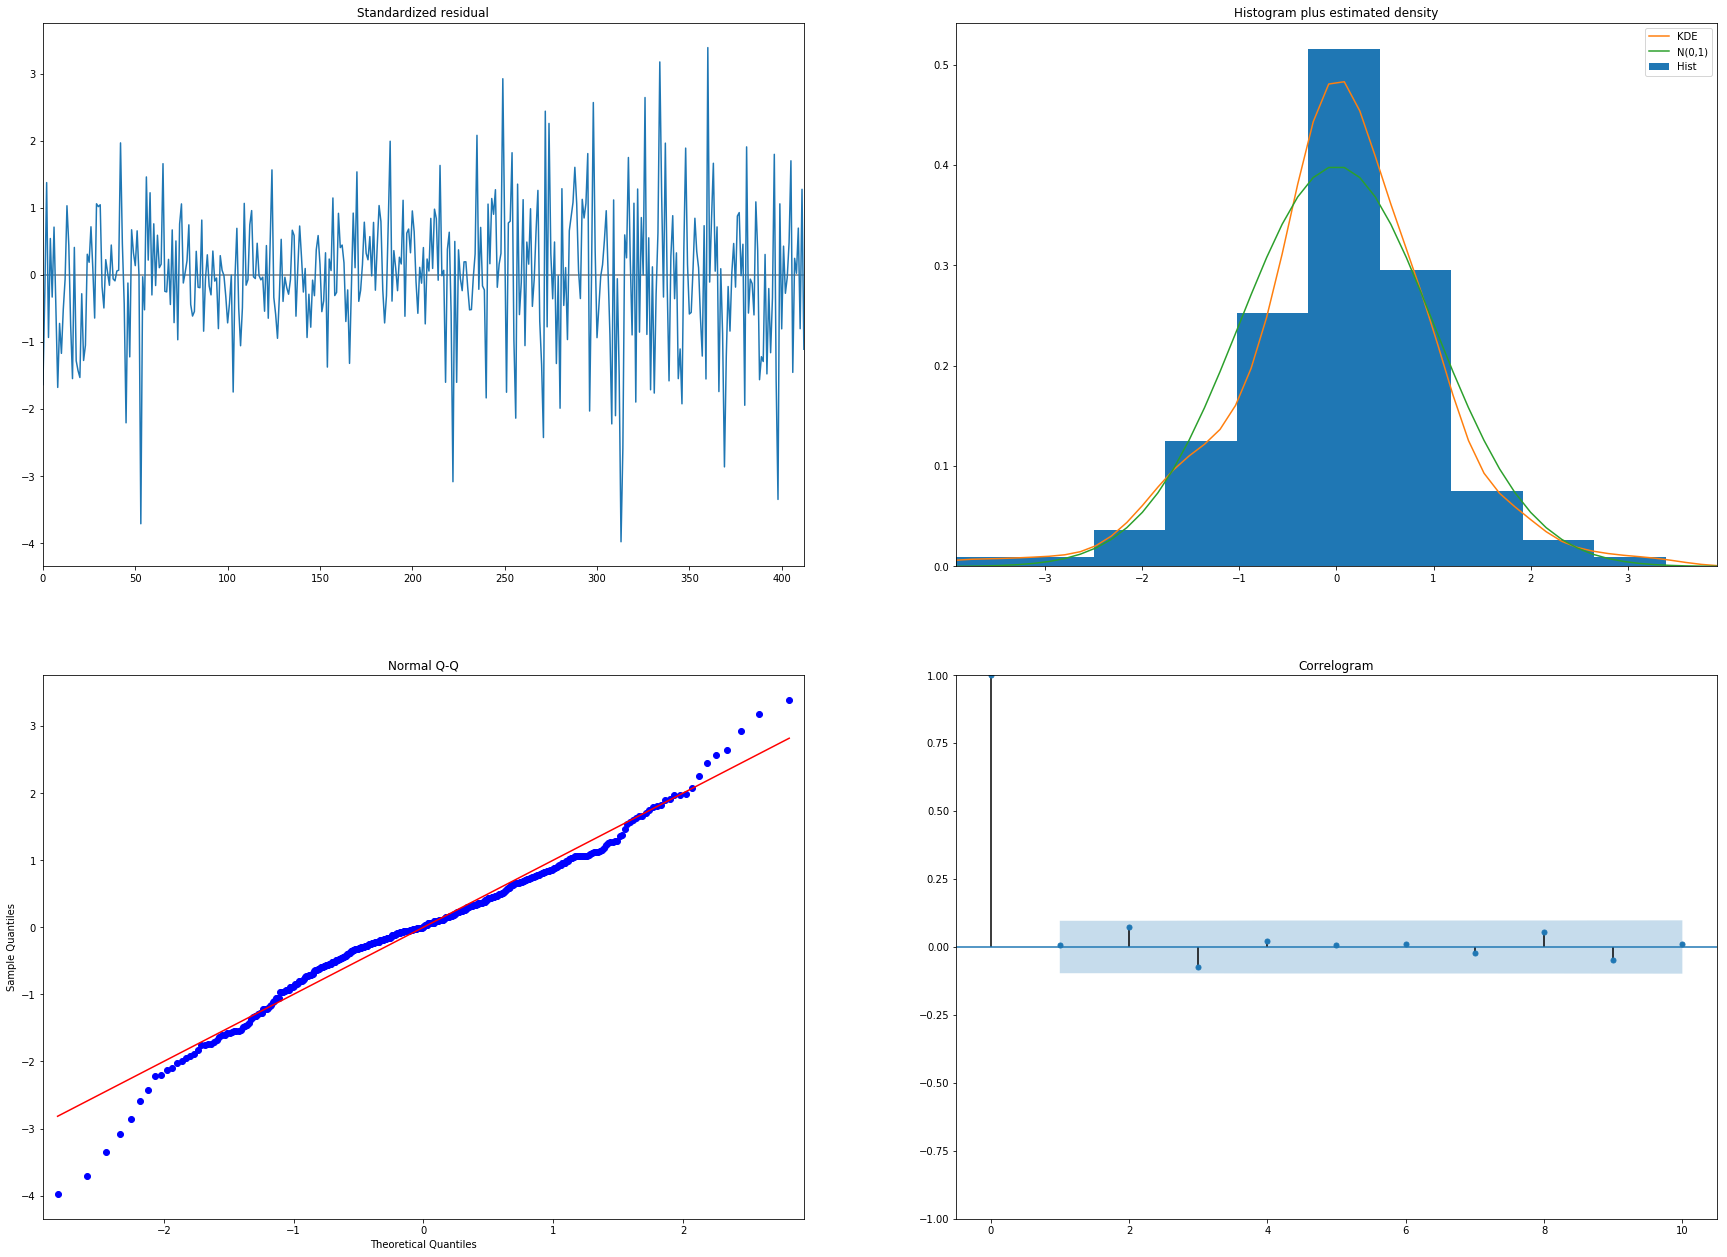

In [556]:
results.plot_diagnostics(figsize=(30,22))
plt.show()

## (a) (iii)

In [557]:
y_hat_avg['SARIMA'] = pd.Series(results.predict())

In [558]:
from sklearn.metrics import mean_squared_error
rms = math.sqrt(mean_squared_error(train_CP, y_hat_avg.SARIMA))
print("Training RMSE value : ",rms)

Training RMSE value :  13.889438942756035


In [559]:
# Forecast with the test dataset. 
y_hat_avg['SARIMA_test'] = pd.Series(results.forecast(86,dynamic=True),index=test_CP.index)

In [560]:
rms = math.sqrt(mean_squared_error(test_CP, y_hat_avg.SARIMA_test))
print("Testing RMSE value : ",rms)

Testing RMSE value :  20.69284878437727


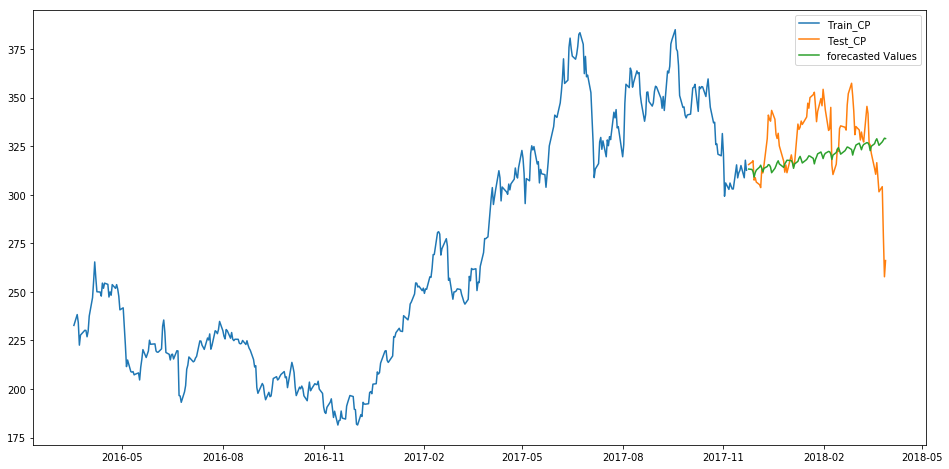

In [561]:
plt.figure(figsize=(16,8))
plt.plot( train_CP, label='Train_CP')
plt.plot(test_CP, label='Test_CP')
plt.plot(y_hat_avg['SARIMA_test'], label='forecasted Values')
plt.legend(loc='best')
plt.show()

# (b) 
### SARIMAX model managed to capture the seasonality very well but the trend wasn't learnt upto the mark. 
### Even though the RMSE value is considerably low, the SARIMAX model has exhibited a tendency to predict values around the center of the testing data rather than try and understand the ups and downs offered by the data.
### Thus we can conclude that there is a need of visual inspection rather than solely relying on the  RMSE to verify the correctness of the model.

# Question-4

In [562]:
data=pd.read_csv("StockTrain.csv")
data['date']=pd.to_datetime(data['date'])

In [563]:
print(data.corr())
data['volume']=np.log(data['volume'])
print(data.corr())

           close    volume      open      high       low
close   1.000000  0.349338  0.995940  0.998369  0.998540
volume  0.349338  1.000000  0.353293  0.366968  0.334407
open    0.995940  0.353293  1.000000  0.998632  0.998272
high    0.998369  0.366968  0.998632  1.000000  0.998503
low     0.998540  0.334407  0.998272  0.998503  1.000000
           close    volume      open      high       low
close   1.000000  0.428367  0.995940  0.998369  0.998540
volume  0.428367  1.000000  0.428400  0.444152  0.411101
open    0.995940  0.428400  1.000000  0.998632  0.998272
high    0.998369  0.444152  0.998632  1.000000  0.998503
low     0.998540  0.411101  0.998272  0.998503  1.000000


### Since correlation of volume is less even after performing log transformation on volume there is no much significant difference.
### Therefore (open, high, low) features useful in predicting closing price of the stock.

In [564]:
from sklearn import linear_model
reg = linear_model.LinearRegression() 
reg.fit(data[['open','high','low']], data['close'])
train=reg.predict(data[['open','high','low']])
rms_train= math.sqrt(mean_squared_error(data['close'], train))
test_data=pd.read_csv("StockTest.csv")
test=reg.predict(test_data[['open','high','low']])
rms_test= math.sqrt(mean_squared_error(test_data['close'], test))
print('RMSE of Train Data:',rms_train)
print('RMSE of Test Data:',rms_test)

RMSE of Train Data: 1.9711227656819361
RMSE of Test Data: 3.4054575667858096
